In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import ipywidgets 
ipywidgets.__version__


'7.4.2'

In [49]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\survery.csv')
df.head(2)

,Timestamp,Industry,Employees_size,IT_size,team_size,LifeCycle_Software,Software_System,Software_system_architecture,Deployable_Components,Runtime_component_instances,...,alert_rate,alert_percentage,maximum_granularity,retention _policy,reliability_availability,maturity level_improvement,adoption_main_obstacles,survey_useful,additional_comments,Unnamed: 40
0,7-25-2016 15:41:09,Health Care,6 - 20,1 - 5,1 - 5,"Requirement Engineering, Design, Middleware an...",IoT application,"Client-server, Service-oriented architecture (...",11 - 20,21 - 50,...,At least 1 per year,1 - 5%,2 to 10 seconds,Monitoring data is aggregated at different gra...,All or some of the monitoring components are m...,We are always improving it,"There are too many tools, Lack of standardizat...",Yes,NaN,NaN
1,7-25-2016 16:14:13,Technology,"501 - 2,000",101 - 500,6 - 20,System administration and operation management,Entertainment,Service-oriented architecture (SOA),> 100,"2,001 - 10,000",...,More than 100 per day,6 - 20%,One second,Monitoring data is aggregated at different gra...,All or some of the monitoring components are m...,We are always improving it,"Lack of automation, Tools are hard to use and ...",No,NaN,NaN


In [36]:
df.dtypes

Timestamp                                  object
Industry                                   object
Employees_size                             object
 IT_size                                   object
team_size                                  object
LifeCycle_Software                         object
Software_System                            object
Software_system_architecture               object
Deployable_Components                      object
 Runtime_component_instances               object
Component_Communication_Styles             object
Deployed_on                                object
Computing_Model_Layers                     object
Release_automation_rate                   float64
upgrades_release rate                      object
System_load_ user_requests                 object
observability_rate                        float64
problem_discover                           object
Incident_first_check_metrics               object
 Most_common_incident                      object


In [3]:
df.columns

Index(['Timestamp', 'Industry', 'Employees_size  ', ' IT_size', 'team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', ' Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'problem_discover  ',
       'Incident_first_check_metrics', ' Most_common_incident ',
       'Incidents_require_manual_ intervention', 'managed_incidents',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'Deployment_techniques', 'third_party_tools ',
       'new_component_in production', 'monitoring_information_access',
       'alert_receiver', 'receive_alerts_employees', 'alert_rate',
       ' alert_percentage', 'maximum_granularity ', ' retention _policy',
       'reliability_availability', 'maturity level_improvement'

# setting Mispelt column names

In [50]:
    ###############################################################
    df['Employees_size']=df['Employees_size  ']
    df['Component_Communication_Styles']=df['Component_Communication_Styles ']
    df['maximum_granularity']=df['maximum_granularity ']
    df['retention_policy']=df[' retention _policy']
    df['Most_common_incident']=df[' Most_common_incident ']
    df['alert_percentage']=df[' alert_percentage']
    df['IT_size']=df[' IT_size']
    df['Runtime_component_instances']=df[' Runtime_component_instances']
    df['Computing_Model_Layers']=df['Computing_Model_Layers ']
    df['System_load_user_requests']=df['System_load_ user_requests']
    
df.drop(['Employees_size  ','Component_Communication_Styles ','maximum_granularity ', ' retention _policy',' Most_common_incident ',' alert_percentage',' IT_size',' Runtime_component_instances','Computing_Model_Layers ','System_load_ user_requests'],axis=1,inplace=True)
 
#df_subset.apply(pd.Series.value_counts)    

# Missing Values Imputation

In [51]:
df[df['team_size'].isna()]
df['team_size'].fillna('6 - 20',inplace=True)
df['team_size'].head(10)

df['upgrades_release rate'].fillna('At least 1 release per month',inplace=True)

df['receive_alerts_employees'].fillna('2.0',inplace=True)
df['System_load_user_requests'].fillna('11 - 100',inplace=True)
df['Incidents_number_history'].fillna('1 - 5',inplace=True)
df['unavailability_time'].fillna('Less than 1 hour',inplace=True)
df['alert_rate'].fillna('1 - 20 per day',inplace=True)
df['alert_percentage'].fillna('1 - 5%',inplace=True)
df['maximum_granularity'].fillna('Over 1 minute',inplace=True)
df['retention_policy'].fillna('Monitoring data is aggregated at different granularities based on its aging',inplace=True)
df['Computing_Model_Layers'].fillna('Virtual machines (IaaS)',inplace=True) 
df['LifeCycle_Software'].fillna('Development',inplace=True) 
df['Component_Communication_Styles'].fillna('Request/response synchronous communication',inplace=True)
df['Deployment_techniques'].fillna('Manual checks via terminal (e.g.: ping, ssh, logs grepping)',inplace=True)
df['new_component_in production'].fillna('It is released with no monitoring or relying on the existing monitoring configuration',inplace=True) 



# convert float dtype frame to string dtype

In [52]:
df['observability_rate']=pd.Series(df['observability_rate'], dtype="str")
df['Release_automation_rate']=pd.Series(df['Release_automation_rate'], dtype="str")
df['observability_rate'].dtype
df['Release_automation_rate'].dtype

df['observability_rate'].fillna('3',inplace=True)
df['Release_automation_rate'].fillna('3',inplace=True)

# Needed columns for analysis

In [53]:
df_cdf = df[[ 'Employees_size', 'IT_size', 'team_size','Deployable_Components', 'Runtime_component_instances', 'Release_automation_rate','upgrades_release rate', 'System_load_user_requests','observability_rate', 'Incidents_number_history', 'unavailability_time','receive_alerts_employees', 'alert_rate','alert_percentage', 'maximum_granularity', 'retention_policy']]

df_ndf = df[['Industry','Computing_Model_Layers','LifeCycle_Software', 'Software_System', 'Software_system_architecture','Deployment_techniques','Component_Communication_Styles','Most_common_incident','new_component_in production','Deployed_on'] ]


In [54]:
df_cdf.isna().sum()


Employees_size                 0
IT_size                        0
team_size                      0
Deployable_Components          0
Runtime_component_instances    0
Release_automation_rate        0
upgrades_release rate          0
System_load_user_requests      0
observability_rate             0
Incidents_number_history       0
unavailability_time            0
receive_alerts_employees       0
alert_rate                     0
alert_percentage               0
maximum_granularity            0
retention_policy               0
dtype: int64

In [55]:
df_ndf.isna().sum()

Industry                          0
Computing_Model_Layers            0
LifeCycle_Software                0
Software_System                   0
Software_system_architecture      0
Deployment_techniques             0
Component_Communication_Styles    0
Most_common_incident              0
new_component_in production       0
Deployed_on                       0
dtype: int64

# splittting the string and only first column is preferred

In [56]:
arr=[]
arr= df['LifeCycle_Software'].str.split(",", n = 3,expand = True)
df.drop(['LifeCycle_Software'],axis=1,inplace=True)
df['LifeCycle_Software']=arr[0]

arr1=[]
arr1= df['Software_system_architecture'].str.split(",", n = 3, expand = True)
df.drop(['Software_system_architecture'],axis=1,inplace=True)
df['Software_system_architecture']=arr1[0]
df.head()
arr=[]
arr= df['Computing_Model_Layers'].str.split(",", n = 3, expand = True)
df.drop(['Computing_Model_Layers'],axis=1,inplace=True)
df['Computing_Model_Layers']=arr[0]

#df['Component_Communication_Styles '].value_counts()[0:10]
arr=[]
arr= df['Component_Communication_Styles'].str.split(",", n = 3, expand = True)
df.drop(['Component_Communication_Styles'],axis=1,inplace=True)
df['Component_Communication_Styles']=arr[0]

arr=[]
arr= df['Deployment_techniques'].str.split(",", n = 3, expand = True)
df.drop(['Deployment_techniques'],axis=1,inplace=True)
df['Deployment_techniques']=arr[0]
###################



In [57]:
df_ndf = df[['Industry','Computing_Model_Layers','LifeCycle_Software', 'Software_System', 'Software_system_architecture','Deployment_techniques','Component_Communication_Styles','Most_common_incident','new_component_in production','Deployed_on'] ]


In [58]:
df_cdf.head(3)

,Employees_size,IT_size,team_size,Deployable_Components,Runtime_component_instances,Release_automation_rate,upgrades_release rate,System_load_user_requests,observability_rate,Incidents_number_history,unavailability_time,receive_alerts_employees,alert_rate,alert_percentage,maximum_granularity,retention_policy
0,6 - 20,1 - 5,1 - 5,11 - 20,21 - 50,5.0,At least 1 release per month,11 - 100,3.0,None,No availability issues in the last year,2 - 5,At least 1 per year,1 - 5%,2 to 10 seconds,Monitoring data is aggregated at different gra...
1,"501 - 2,000",101 - 500,6 - 20,> 100,"2,001 - 10,000",4.0,More than 10 releases per day,"1,001 - 10,000",4.0,6 - 20,Less than 12 hours,21 - 100,More than 100 per day,6 - 20%,One second,Monitoring data is aggregated at different gra...
2,21 - 100,21 - 100,6 - 20,1 - 3,1 - 5,3.0,At least 1 release per month,1 - 10,2.0,1 - 5,More than 12 hours,6 - 20,1 - 20 per day,6 - 20%,Over 1 minute,Monitoring data is stored as raw data forever


In [59]:
df_ndf.head(3)

,Industry,Computing_Model_Layers,LifeCycle_Software,Software_System,Software_system_architecture,Deployment_techniques,Component_Communication_Styles,Most_common_incident,new_component_in production,Deployed_on
0,Health Care,Bare metal,Requirement Engineering,IoT application,Client-server,Manual checks via terminal (e.g.: ping,Request/response asynchronous (response expec...,Buggy release of core components,It is released with no monitoring or relying o...,Hybrid hosting
1,Technology,Virtual machines (IaaS),System administration and operation management,Entertainment,Service-oriented architecture (SOA),Automated checks using third party monitoring ...,Request/response synchronous communication,Unexpected race conditions,Both QoS and business metrics and checks relat...,Private hosting
2,Technology,Bare metal,System administration and operation management,Product engineering software,Monolithic architecture,Custom dashboards internally developed,One-way (no response expected) request communi...,CPU saturation,Both QoS and business metrics and checks relat...,Private hosting


# handling rear values

In [60]:
# As there are many categories inside industry column . we will handle Rare elements in each categorical column
for col in df_ndf:
    temp=df.groupby(col)['Industry'].count()/len(df_ndf)
    temp_df=temp[temp>0.01].index
    df_ndf[col]=np.where(df_ndf[col].isin(temp_df),df_ndf[col],'Other')

In [62]:
df_new=pd.concat([df_ndf,df_cdf],axis=1)

# kmodes Algorithm for all categorical features which are not encoded( Hamming distance)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 2000.0
Run 1, iteration: 2/100, moves: 6, cost: 1993.0
Run 1, iteration: 3/100, moves: 11, cost: 1989.0
Run 1, iteration: 4/100, moves: 1, cost: 1989.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 1899.0
Run 1, iteration: 2/100, moves: 25, cost: 1892.0
Run 1, iteration: 3/100, moves: 1, cost: 1892.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 1858.0
Run 1, iteration: 2/100, moves: 18, cost: 1837.0
Run 1, iteration: 3/100, moves: 9, cost: 1834.0
Run 1, iteration: 4/100, moves: 1, cost: 1834.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 

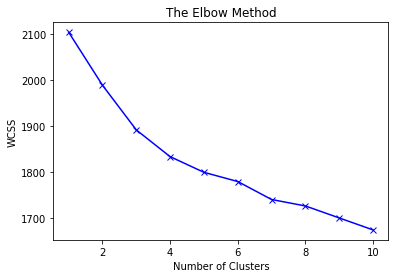

In [64]:
#Using the elbow method to find the optimal number of clusters
from kmodes.kmodes import KModes 
wcss=[]
for i in range(1,11) :
    kmodes=KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1)
    kmodes.fit(df_new)
    wcss.append(kmodes.cost_)
plt.plot(range(1,11),wcss,'bx-')
#plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [92]:
kmodes = KModes(n_clusters=6, init = "Cao", n_init = 1, verbose=1)
kkk = kmodes.fit_predict(df_new)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 1783.0
Run 1, iteration: 2/100, moves: 7, cost: 1780.0
Run 1, iteration: 3/100, moves: 0, cost: 1780.0


In [93]:
kkk

array([0, 2, 0, 4, 4, 4, 0, 1, 2, 2, 0, 1, 0, 5, 4, 5, 0, 4, 3, 0, 0, 0,
       1, 0, 2, 3, 0, 0, 4, 3, 2, 2, 4, 5, 0, 0, 5, 1, 5, 0, 0, 4, 0, 2,
       0, 0, 4, 5, 5, 0, 2, 1, 3, 1, 2, 1, 2, 4, 4, 0, 0, 2, 0, 1, 2, 0,
       0, 5, 0, 0, 1, 1, 0, 2, 0, 3, 5, 0, 2, 0, 2, 3, 3, 5, 0, 1, 4, 0,
       2, 0, 4, 0, 1, 0, 3, 4, 0, 4, 0, 4, 3, 2, 5, 2, 3, 2, 0, 4, 0, 0,
       3, 3, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 5, 4, 1, 0, 0, 5, 0, 2, 5, 0,
       0, 0, 1, 2, 0, 4, 3, 4, 0], dtype=uint16)

In [75]:
clustersDf = pd.DataFrame(kkk)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_new, clustersDf], axis = 1)


In [76]:
combinedDf.head()

,Industry,Computing_Model_Layers,LifeCycle_Software,Software_System,Software_system_architecture,Deployment_techniques,Component_Communication_Styles,Most_common_incident,new_component_in production,Deployed_on,...,System_load_user_requests,observability_rate,Incidents_number_history,unavailability_time,receive_alerts_employees,alert_rate,alert_percentage,maximum_granularity,retention_policy,cluster_predicted
0,Health Care,Bare metal,Requirement Engineering,IoT application,Client-server,Manual checks via terminal (e.g.: ping,Request/response asynchronous (response expec...,Buggy release of core components,It is released with no monitoring or relying o...,Hybrid hosting,...,11 - 100,3.0,None,No availability issues in the last year,2 - 5,At least 1 per year,1 - 5%,2 to 10 seconds,Monitoring data is aggregated at different gra...,0
1,Technology,Virtual machines (IaaS),System administration and operation management,Entertainment,Service-oriented architecture (SOA),Automated checks using third party monitoring ...,Request/response synchronous communication,Other,Both QoS and business metrics and checks relat...,Private hosting,...,"1,001 - 10,000",4.0,6 - 20,Less than 12 hours,21 - 100,More than 100 per day,6 - 20%,One second,Monitoring data is aggregated at different gra...,2
2,Technology,Bare metal,System administration and operation management,Product engineering software,Monolithic architecture,Custom dashboards internally developed,One-way (no response expected) request communi...,CPU saturation,Both QoS and business metrics and checks relat...,Private hosting,...,1 - 10,2.0,1 - 5,More than 12 hours,6 - 20,1 - 20 per day,6 - 20%,Over 1 minute,Monitoring data is stored as raw data forever,0
3,Technology,Third party services (SaaS),Development,Product engineering software,Client-server,Manual checks via terminal (e.g.: ping,One-way (no response expected) request communi...,Buggy release of core components,It is released with no monitoring or relying o...,Private hosting,...,1 - 10,3.0,6 - 20,Less than 20 minutes,2 - 5,At least 1 per week,More than 50%,Over 1 minute,Monitoring data is aggregated at different gra...,4
4,Technology,Virtual machines (IaaS),Development,Big data application,Client-server,Automated checks using custom scripts (e.g.: c...,Request/response synchronous communication,Buggy release of core components,It is released with no monitoring or relying o...,Private hosting,...,"> 10,000",3.0,1 - 5,Less than 20 minutes,2 - 5,1 - 20 per day,6 - 20%,2 to 10 seconds,Monitoring data is not stored,4


In [94]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]


In [3]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green','red','yellow']
colored = [colors[k] for k in range(6) ]
print (colored[0:6])
sns.countplot(combinedDf,hue=combinedDf[combinedDf['cluster_predicted'] == 0])
plt.title('Clusters of customers')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()

['orange', 'blue', 'purple', 'green', 'red', 'yellow']
